In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
dataset = pd.read_csv('CleanedLaptops.csv')

# Correlation Heatmap

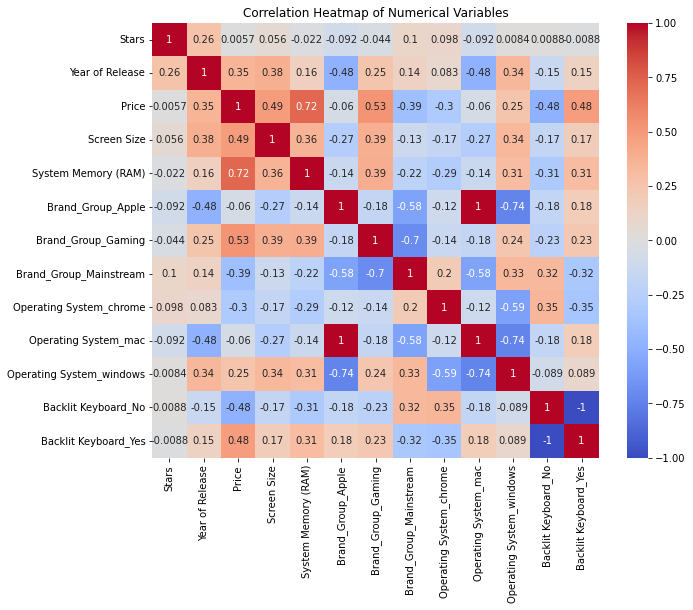

In [39]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Price Distribution

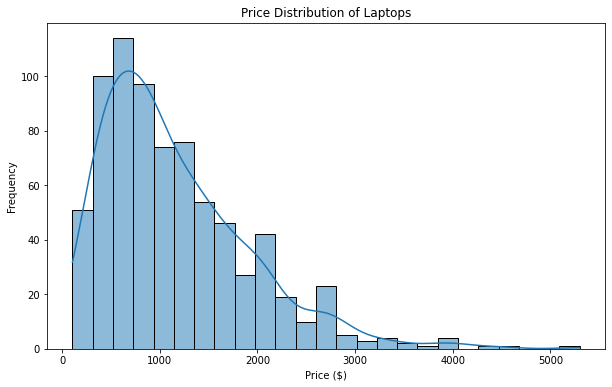

In [40]:


# Histogram of Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Price'], kde=True)
plt.title('Price Distribution of Laptops')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Average Rating By Year

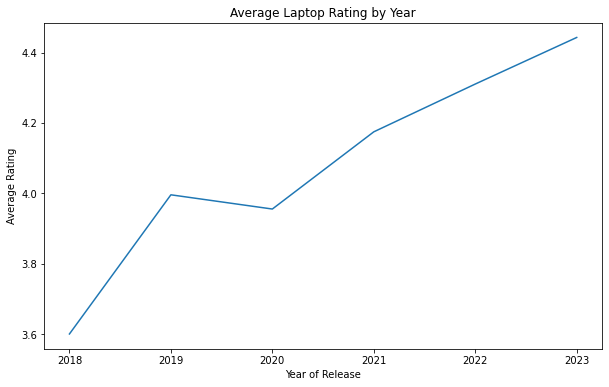

In [41]:
# Average Rating by Year
avg_rating_by_year = dataset.groupby('Year of Release')['Stars'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rating_by_year, x='Year of Release', y='Stars')
plt.title('Average Laptop Rating by Year')
plt.xlabel('Year of Release')
plt.ylabel('Average Rating')
plt.show()

# Yearly Trends in Price and Stars (Dual Axis Line Chart):

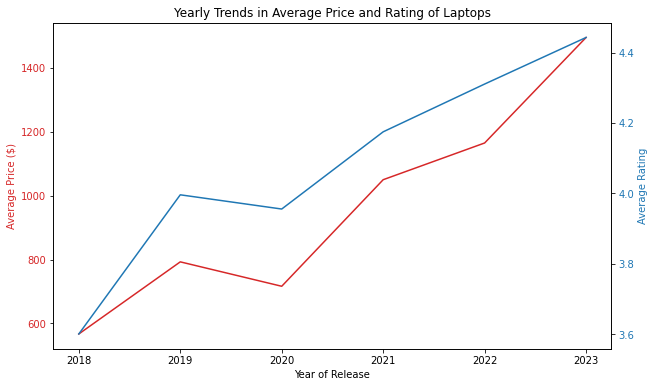

In [42]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Dual axis line chart
color = 'tab:red'
ax1.set_xlabel('Year of Release')
ax1.set_ylabel('Average Price ($)', color=color)
ax1.plot(dataset.groupby('Year of Release')['Price'].mean(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Average Rating', color=color)
ax2.plot(dataset.groupby('Year of Release')['Stars'].mean(), color=color) 
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Yearly Trends in Average Price and Rating of Laptops') 
plt.show()

# Brand Type Count (Bar Chart)

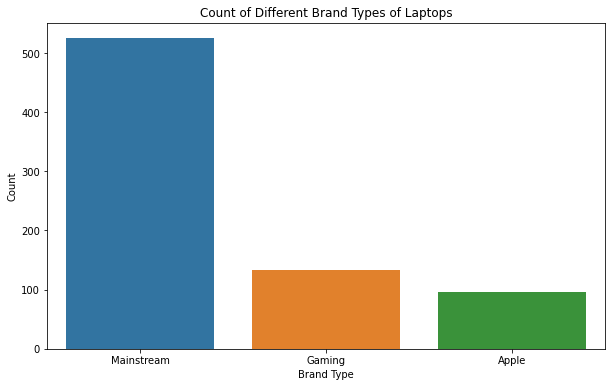

In [43]:
# Count of Different Brand Types
dataset['Brand Type'] = 'Mainstream'
dataset.loc[dataset['Brand_Group_Gaming'] == 1, 'Brand Type'] = 'Gaming'
dataset.loc[dataset['Brand_Group_Apple'] == 1, 'Brand Type'] = 'Apple'

brand_type_count = dataset['Brand Type'].value_counts().reset_index()
brand_type_count.columns = ['Brand Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=brand_type_count, x='Brand Type', y='Count')
plt.title('Count of Different Brand Types of Laptops')
plt.xlabel('Brand Type')
plt.ylabel('Count')
plt.show()

# Operating System Distribution (Pie Chart)

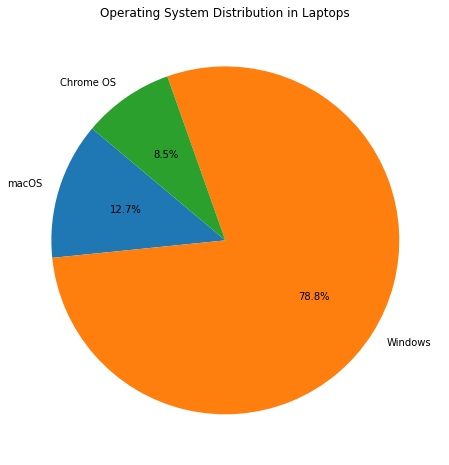

In [44]:
# Operating System Distribution
os_counts = dataset[['Operating System_mac', 'Operating System_windows', 'Operating System_chrome']].sum()

plt.figure(figsize=(8, 8))
plt.pie(os_counts, labels=['macOS', 'Windows', 'Chrome OS'], autopct='%1.1f%%', startangle=140)
plt.title('Operating System Distribution in Laptops')
plt.show()

# Brand and Operating System Interaction (Grouped Bar Chart):

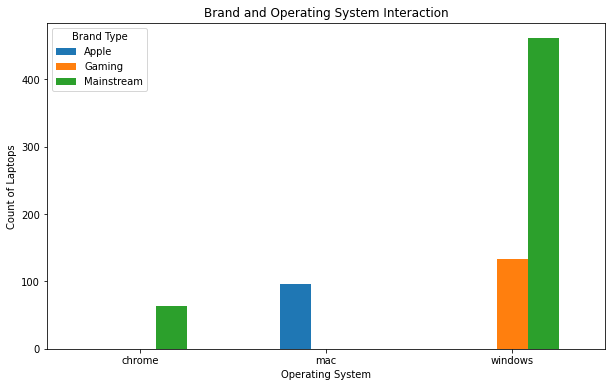

In [45]:
# fix 
# Creating a new 'Operating System' column based on the individual OS columns
conditions = [
    (dataset['Operating System_mac'] == 1),
    (dataset['Operating System_windows'] == 1),
    (dataset['Operating System_chrome'] == 1)
]
choices = ['mac', 'windows', 'chrome']
dataset['Operating System'] = np.select(conditions, choices, default='unknown')

# Creating a pivot table for the grouped bar chart
pivot = dataset.pivot_table(index='Operating System', columns='Brand Type', aggfunc='size', fill_value=0)

# Grouped bar chart
pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Brand and Operating System Interaction')
plt.xlabel('Operating System')
plt.ylabel('Count of Laptops')
plt.xticks(rotation=0)
plt.show()

# Yearly Trends in Price and Stars (Dual Axis Line Chart):

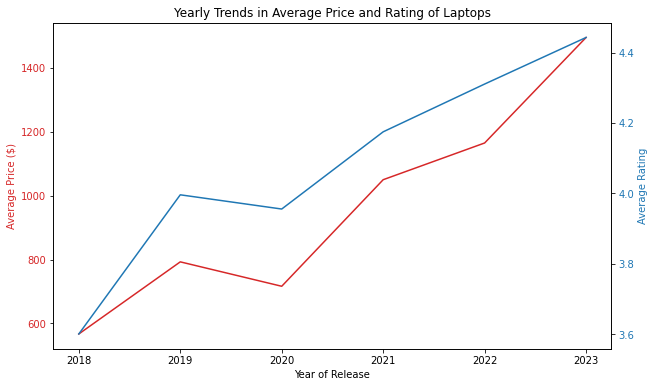

In [46]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Dual axis line chart
color = 'tab:red'
ax1.set_xlabel('Year of Release')
ax1.set_ylabel('Average Price ($)', color=color)
ax1.plot(dataset.groupby('Year of Release')['Price'].mean(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Average Rating', color=color)
ax2.plot(dataset.groupby('Year of Release')['Stars'].mean(), color=color) 
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Yearly Trends in Average Price and Rating of Laptops') 
plt.show()